# Discussion physique

Dans cette première partie, nous nous concentrerons sur la propagation d'une fake news par le seul biais d'une interaction entre agents physiquement proches. Cette discussion pourra avoir lieu **entre 2 à 9 personnes**.

On rappelle la description d'un agent : 

|Caractéristique||Nom    |Type   |Intervalle     |Valeur initiale  | Fixe ?    |
|:-------------:||:-----:|:-----:|:-------------:|:---------------:|:---------:|
|**Nom** : nom de l'agent (clé du dict)                                  ||**nom**    |str    |[str(0),str(N)]|str(k)|Oui|
|**Opinion** : y croit (1) ou non (0)                                    ||**op**     |int    |[0,1]          |0     |Non|
|**Déjà vu** : a déjà été confronté à la news (True) ou pas (False)      ||**deja_vu**|bool   |[True,False]   |False |Non|
|**Force de persuasion** : capacité à convaincre qqun (accrue qd tend vers 1) ||**fp**|float  |[0,1]          |Random|Oui|
|**Conviction** : caractérise la conviction à la news (tend vers 1) ou non (tend vers 0)||**p**|float  |[0,1] |0.5   |Non| 

**Processus de discussion détaillé :** 
- **1ère étape : Mise à jour des convictions**  

A partir d'une matrice représentant l'ensemble de la population, nous sélectionnerons un agent et son voisinage pour créer une liste de 2 à 9 personnes : la **liste discussion**.
- si il n'y a que _2 personnes_ dans la liste discussion, seule la **force de persuasion** influera et ce sur un seul agent, celui dont la force de persuasion est la plus faible. Celle-ci est régie par la loi suivante : lorsque $  fp_i $ < $  fp_j $ on applique la formule: $ p_i \leftarrow p_i + fp_i  \cdot ( p_j - p_i ) $
- si la discussion comprend _de 3 à 9 personnes_, ce sera le **voisinage** qui influera sur la conviction de chacun selon la loi suivante. Chaque individu modifie sa conviction en fonction de la moyenne des convictions des autres pondérée de leur force de persuasion ($ moy = \frac{\sum p_i*fp_i}{\sum fp_i} $) et du seuil de persuasion $\sigma$ : si $ |p_i-moy| < \sigma $, alors $ p_i \leftarrow moy $ sinon, $p_i$ ne change pas.  

De plus, la conviction sera affectée par la **crédibilité de la news** $news$ par la loi suivante : $ p_i \leftarrow p_i + fp_i \cdot ( news - p_i ) $ 
- **2ème étape : Mise à jour des opinions**  
Pour chaque agent, on modifie son opinion en fonction de sa conviction : si $ p_i  > 0.5 $ , $op_i$ passe de $0$ à $1$ et inversement.

# Initialisation du système

Nous initialisons **une matrice** de $ N\_1dim*N\_1dim=N $ individus (nous nous aviserons donc de choisir N tel qu'il soit un carré parfait). De plus, nous modélisons un réseau discussion par **un dictionaire**, qui associe à chaque individu un tuple, de la forme $ dict[str:tuple[int,bool,float,float]] $. Celui-ci représentera intégralement un agent et ses caractéristiques.

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import random

#description d'un agent : nom:(opinion, deja_vu , force_de_persuasion , conviction)
#                         nom:(   op  , deja_vu ,       fp            ,     p     )

N_1dim = 25     #nb de membres du réseau sur une dimension
N = N_1dim**2  #nb de membres du réseau discussion physique
nb_malv = 12    #nb d'agents malveillants
steps = 100    #nb de pas de temps
seuil = 0.3    #seuil

#Initialisation d'un réseau d'humains :
Reseau_discu={str(k):(0,False,fp,0.5) for k in range(1,N+1) for fp in np.random.uniform(low=0.0, high=1.0,size=N)}
Noms_reseau_discu=[k for k in range(N)]

#Initialisation d'un réseau avec des agents malveillants :
def init_sys_avec_malv(n_1dim,nb_malv):
    
    Pop={str(k):(0,False,fp,0.5) for k in range(1,N+1) for fp in np.random.uniform(low=0.0, high=1.0,size=N)}
    L=np.random.choice(range(1,(n_1dim**2)+1), size=nb_malv, replace=False)
    for e in L:
        Pop[str(e)]=(1,True,0.9,0.8)
    
    return Pop

Pop_malv=init_sys_avec_malv(N_1dim,nb_malv)
print('Réseau avec malveillants : \n',Pop_malv)

#Représentation des agents en 2 dimensions (sur une matrice) :
Agents=np.arange(1,N_1dim*N_1dim+1).reshape(N_1dim,N_1dim)
print('Agents :\n',Agents)

#Réseau à valeurs quelconques (au milieu de la simulation par exemple) pour faire des tests :
Test_reseau={str(k):(np.random.choice([0,1]),np.random.choice([False,True]),np.random.random_sample(),np.random.random_sample()) for k in range(1,N+1)}

#Matrice des opinions de départ :
def matrice_opinions(reseau,n_1dim):
    Op=np.zeros((n_1dim,n_1dim))
    i=0
    j=0
    for (nom,(op,deja_vu,persu,p)) in reseau.items():
        Op[i,j]=int(op)
        if j<(n_1dim-1):
            j=j+1
        elif j==(n_1dim-1):
            j=0
            i=i+1
    return Op

print(matrice_opinions(Pop_malv,N_1dim))

#Matrice des convictions de départ
def matrice_convic(reseau,n_1dim):
    C=np.zeros((n_1dim,n_1dim))
    i=0
    j=0
    for (nom,(opinion,deja_vu,persu,p)) in reseau.items():
        C[i,j]=p
        if j<(n_1dim-1):
            j=j+1
        elif j==(n_1dim-1):
            j=0
            i=i+1
    return C

print(matrice_convic(Pop_malv,N_1dim))

Réseau avec malveillants : 
 {'39': (0, False, 0.8053154522546698, 0.5), '302': (0, False, 0.35780574609807303, 0.5), '456': (0, False, 0.053715049617538146, 0.5), '31': (0, False, 0.556860364098961, 0.5), '568': (0, False, 0.12246539470119366, 0.5), '497': (0, False, 0.0018532103135022737, 0.5), '161': (0, False, 0.746367186783142, 0.5), '365': (0, False, 0.78318930953828, 0.5), '285': (0, False, 0.2668118180968482, 0.5), '95': (0, False, 0.011846116931287898, 0.5), '347': (0, False, 0.17669507948772267, 0.5), '26': (0, False, 0.14727652223790366, 0.5), '372': (0, False, 0.807093327764247, 0.5), '446': (0, False, 0.20152266063095392, 0.5), '32': (0, False, 0.49437090236071846, 0.5), '380': (0, False, 0.9953146179116831, 0.5), '28': (0, False, 0.04991516570221355, 0.5), '85': (0, False, 0.5033988267534242, 0.5), '283': (0, False, 0.8353861754692096, 0.5), '361': (0, False, 0.3155481034695625, 0.5), '561': (0, False, 0.3750680121279799, 0.5), '412': (0, False, 0.9898153197951229, 0.5), 

# Facteurs modifiant les paramètres

## Influence de la crédibilité de la news sur p

In [273]:
#Influence crébibilité news sur le p d'une personne
news = np.random.random_sample()
print('Crédibilité de l\'info:',news)

def influ_credib_news(news,p,fp):
    #news: crédibilité de la news
    #p: param déterminant le chgt ou non de l'opinion    
    i = p
    i = i+fp*(news-i)
    return i

print(influ_credib_news(news,0.5,0.75))

Crédibilité de l'info: 0.01797806149539416
0.13848354612154562


## Influence du voisinage sur p

In [274]:
#Sélection d'un agent et de son voisinage pour établir un discussion
def selection_voisinage(Matrice,n_1dim):
    '''Sélection aléatoire des voisinages d'un individu
    '''
    L=[]                               #liste voisinage (pers susceptibles de discuter)
    Ldiscu=[]                          #liste discussion (pers qui vont discuter)
    size=np.random.choice(range(2,10)) #nb pers discussion
    
    ic=np.random.choice(range(n_1dim)) #ic,jc : indices de l'agent central
    jc=np.random.choice(range(n_1dim))
    a_central=Matrice[ic,jc]
    
    if ic>0 and ic<(n_1dim-1) and jc>0 and jc<(n_1dim-1):
        L=np.reshape(Matrice[ic-1 : ic+2 , jc-1 : jc+2] , 9)        
    elif ic==0 and jc>0 and jc<(n_1dim-1):          #a_central sur arête sup
        L=[(Matrice[ic,jc-1 : jc+2])
           ,(Matrice[ic+1,jc-1 : jc+2])
           ,(Matrice[n_1dim-1, jc-1 : jc+2])]
        L=np.reshape(L,9)
    elif ic==(n_1dim-1) and jc>0 and jc<(n_1dim-1): #a_central sur arête inf
        L=[(Matrice[ic,jc-1 : jc+2])
           ,(Matrice[ic-1,jc-1 : jc+2])
           ,(Matrice[0, jc-1 : jc+2])]
        L=np.reshape(L,9)        
    elif jc==0 and ic>0 and ic<(n_1dim-1):          #a_central sur arête gauche
        L=[(Matrice[ic-1 : ic+2,jc])
           ,(Matrice[ic-1 : ic+2,jc+1])
           ,(Matrice[ic-1 : ic+2,n_1dim-1])]
        L=np.reshape(L,9)        
    elif jc==(n_1dim-1) and ic>0 and ic<(n_1dim-1): #a_central sur arête droite
        L=[(Matrice[ic-1 : ic+2,jc])
           ,(Matrice[ic-1 : ic+2,jc-1])
           ,(Matrice[ic-1 : ic+2,0])]
        L=np.reshape(L,9)        
    elif a_central==1:                              #a_central sur coin sup/gauche
        L=[n_1dim,a_central,2,n_1dim*2,n_1dim+1,n_1dim+2,n_1dim*n_1dim,n_1dim*(n_1dim-1)+1,n_1dim*(n_1dim-1)+2]
        L=np.array(L)        
    elif a_central==n_1dim:                                                    #a_central sur coin sup/droit
        L=[n_1dim-1,a_central,1,n_1dim*2-1,n_1dim*2,n_1dim+1,n_1dim*n_1dim-1,n_1dim*n_1dim,n_1dim*(n_1dim-1)+1]
        L=np.array(L)
    elif a_central==n_1dim*(n_1dim-1)+1:            #a_central sur coin inf/gauche
        L=[n_1dim*(n_1dim-1),Matrice[ic-1,jc],Matrice[ic-1,jc+1]
          ,n_1dim*n_1dim,a_central,Matrice[ic,jc+1]
          ,1,2,n_1dim]
        L=np.array(L)        
    elif a_central==(n_1dim*n_1dim):                #a_central sur coin inf/droit
        L=[a_central-n_1dim-1,a_central-n_1dim,Matrice[ic-1,0]
          ,a_central-1,a_central,a_central-n_1dim+1
          ,1,n_1dim-1,n_1dim]
        L=np.array(L)
    
    Ldiscu=np.random.choice(L,size,replace=False)
             
    return Ldiscu

Population=np.arange(1,N_1dim*N_1dim+1).reshape(N_1dim,N_1dim)
List_discu=selection_voisinage(Population,N_1dim)
print('Population :\n',Population)
print('Liste des personnes qui vont discuter :',List_discu)

Population :
 [[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   19  20  21  22  23  24  25]
 [ 26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
   44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
   69  70  71  72  73  74  75]
 [ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
   94  95  96  97  98  99 100]
 [101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
  119 120 121 122 123 124 125]
 [126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  144 145 146 147 148 149 150]
 [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
  169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
  194 195 196 197 198 199 200]
 [201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
  219 220 221 222 223 224 225]
 [226 227 228 229 230 231 232 233 234 235

In [275]:
#Modification du paramètre p de x en fonction de la force de persuasion de y et vice versa :
def force_persu(x, y, reseau):
        
    opx,deja_vux,fpx,px=reseau[str(x)]
    opy,deja_vuy,fpy,py=reseau[str(y)]
    if fpx>fpy:
        py=py+fpy*(px-py)
    elif fpy>fpx:
        px=px+fpx*(py-px)
    
    reseau[str(x)]=(opx,True,fpx,px)
    reseau[str(y)]=(opy,True,fpy,py)
    
    return reseau


#Influence du voisinage :
    # si 2 personnes, force persu. Sinon, moyenne des p pondérée des fp; si abs(pi-moy)>seuil, pi=pi, sinon pi=moy
def influ_voisinage(list_discu,reseau,seuil):
    
    P=[]   #liste des convictions des membres de la discussion
    F=[]   #liste des forces de persuasion des membres de la discussion
    N=[]   #liste des noms des membres de la discussion
    i=0
    
    for k in list_discu:
        op_k,deja_k,fp_k,p_k=reseau[str(k)]
        N.append(int(k))
        P.append(p_k)
        F.append(fp_k)
            
    if len(N)==2:
        reseau=force_persu(N[0],N[1],reseau)
    else:
        for a in N:
            op_a,deja_a,fp_a,p_a=reseau[str(a)]
            other_p=P[0:a]+P[a+1:len(P)]
            other_fp=F[0:a]+F[a+1:len(F)]            
            moy=np.average(other_p,weights=other_fp)
            if abs(p_a-moy)<seuil:
                p_a=moy
            reseau[str(a)]=(op_a,True,fp_a,p_a)
    
            
    return reseau

print(influ_voisinage(List_discu,Test_reseau,seuil))

{'39': (1, True, 0.22991686343685314, 0.5484201983155707), '302': (0, True, 0.388424579323541, 0.38311513911205664), '456': (1, False, 0.6160332871536531, 0.4283809643608528), '31': (1, True, 0.4656637767104602, 0.7097589623704158), '568': (1, True, 0.6606073711495304, 0.7917695469493666), '497': (0, True, 0.9056253171816794, 0.10512289535805008), '161': (0, False, 0.8778153778910048, 0.622802770882925), '365': (0, False, 0.9410869446971757, 0.43870953322296713), '285': (0, True, 0.19651927321340523, 0.9813103110491507), '95': (1, False, 0.5876901487065028, 0.9260375056371841), '347': (1, True, 0.1014908196620461, 0.776723798847597), '26': (1, False, 0.03223307759867522, 0.8731008024708414), '372': (1, False, 0.2227144216186785, 0.6739261201611809), '446': (0, False, 0.19191952708630855, 0.34777291201741334), '32': (1, True, 0.36053501251046605, 0.2937925848867633), '380': (1, True, 0.9965091289763743, 0.257243772184216), '28': (0, True, 0.03155225357514724, 0.3676037578978888), '85': 

# Simulation

In [276]:
def simulation_op(reseau,n_1dim,mat_pop,names,steps,seuil):
    """retourne la matrice des opinions de la population après un certain nb d'étapes"""
    
    M=matrice_opinions(reseau,n_1dim)
    results=[]
    results.append(M.copy())
    
    for simu in range(steps):
        i=np.random.choice(names)
        List_discu=selection_voisinage(mat_pop,n_1dim)
        Res_p_changé=influ_voisinage(List_discu,reseau,seuil)
        for c in Res_p_changé:
            op,deja,fp,p=Res_p_changé[c]
            if p>0.5 and op==0:
                op=1
                Res_p_changé[c]=(op,deja,fp,p)
            elif p<0.5 and op==1:
                op=0
                Res_p_changé[c]=(op,deja,fp,p)
        Op=[]
        P=[]
        for e in Res_p_changé:
            op,deja,fp,p=Res_p_changé[e]
            Op.append(op)
            P.append(p)
        Op_final=np.reshape(Op, (n_1dim,n_1dim))
        P_final=np.reshape(P, (n_1dim,n_1dim))
        results.append(Op_final.copy())
        
    return results

simulation_op(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,steps,seuil)

[array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [277]:
def simulation_p(reseau,n_1dim,mat_pop,names,steps,seuil):
    """retourne la matrice des opinions de la population après un certain nb d'étapes"""
    
    M=matrice_convic(reseau,n_1dim)
    results=[]
    results.append(M.copy())
    
    for simu in range(steps):
        i=np.random.choice(names)
        List_discu=selection_voisinage(mat_pop,n_1dim)
        Res_p_changé=influ_voisinage(List_discu,reseau,seuil)
        for c in Res_p_changé:
            op,deja,fp,p=Res_p_changé[c]
            if p>0.5 and op==0:
                op=1
                Res_p_changé[c]=(op,deja,fp,p)
            elif p<0.5 and op==1:
                op=0
                Res_p_changé[c]=(op,deja,fp,p)
        Op=[]
        P=[]
        for e in Res_p_changé:
            op,deja,fp,p=Res_p_changé[e]
            Op.append(op)
            P.append(p)
        Op_final=np.reshape(Op, (n_1dim,n_1dim))
        P_final=np.reshape(P, (n_1dim,n_1dim))
        results.append(P_final.copy())
        
    return results

simulation_p(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,steps,seuil)

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.8,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.8, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.8],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

## Affichage

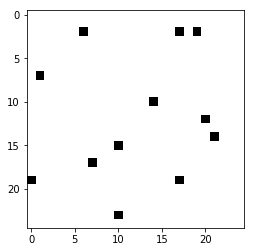

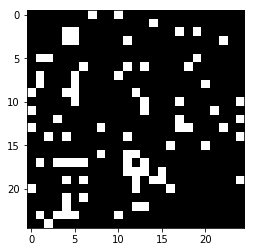

In [278]:
#Affichage des opinions de départ
Opinions_start=simulation(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,500,0.5)[0]
fig=plt.figure()
im=plt.imshow(Opinions_start,cmap='binary')

#Affichage des opinions d'arrivée
Opinions_end=simulation(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,500,0.5)[-1]
fig=plt.figure()
im=plt.imshow(Opinions_end,cmap='binary')

#noir = 1 ; blanc = 0

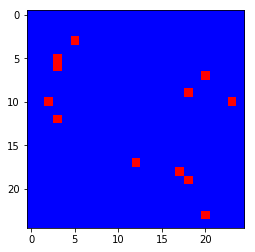

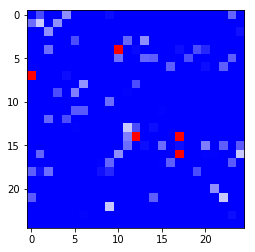

In [291]:
#Affichage des convictions (bleu -> 0 ; rouge -> 1)

Convictions_start=simulation_p(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,steps,seuil)[0]
fig=plt.figure()
im=plt.imshow(Convictions_start,cmap='bwr')

#Affichage des convictions (bleu -> 0 ; rouge -> 1)

Convictions_end=simulation_p(init_sys_avec_malv(N_1dim,nb_malv),N_1dim,Population,Noms_reseau_discu,steps,seuil)[-1]
fig=plt.figure()
im=plt.imshow(Convictions_end,cmap='bwr')

**Brouillons + tests + mémos numpy**

In [281]:
"""numpy.random.choice(liste(ou entier) , taille de l'array , replace=False ne pas avoir 2 fois la meme valeur , proba)
   Parcours d'une matrice : for k in np.nditer(matrice)
   
N=15 #nombre de membres du réseau discussion physique
#description d'un agent : (nom,opinion,deja_vu,persuasion,chgt_opinion)
Reseau_discu={str(k):(0,False,fp,0.5) for k in range(N) for fp in np.random.uniform(low=0.0, high=1.0,size=N)}
Noms_reseau_discu=[str(k) for k in range(N)]

size = int(np.random.choice(range(2,10)))
Discu = np.random.choice(Noms_reseau_discu,size,replace=False)
print('Membres de la discussion',Discu)

def matrice_discu(L,reseau):
    matrice=np.matrix([['00','00','00'],['00','00','00'],['00','00','00']])
    i=0
    j=0
    for (nom,(opinion,deja_vu,persu,p)) in reseau.items():
        if nom in L:
            matrice[i,j]=nom
            if j!=2:
                j=j+1
            elif j==2:
                j=0
                i=i+1
    return matrice
    
print('Matrice discussion :\n',matrice_discu(Discu.copy(),Reseau_discu))

Test_reseau=[(str(k),np.random.choice([0,1]),np.random.choice([False,True]),np.random.random_sample(),np.random.random_sample()) for k in range(N)]
print('Réseau aléatoire :',Test_reseau)

"""

"numpy.random.choice(liste(ou entier) , taille de l'array , replace=False ne pas avoir 2 fois la meme valeur , proba)\n   Parcours d'une matrice : for k in np.nditer(matrice)\n   \nN=15 #nombre de membres du réseau discussion physique\n#description d'un agent : (nom,opinion,deja_vu,persuasion,chgt_opinion)\nReseau_discu={str(k):(0,False,fp,0.5) for k in range(N) for fp in np.random.uniform(low=0.0, high=1.0,size=N)}\nNoms_reseau_discu=[str(k) for k in range(N)]\n\nsize = int(np.random.choice(range(2,10)))\nDiscu = np.random.choice(Noms_reseau_discu,size,replace=False)\nprint('Membres de la discussion',Discu)\n\ndef matrice_discu(L,reseau):\n    matrice=np.matrix([['00','00','00'],['00','00','00'],['00','00','00']])\n    i=0\n    j=0\n    for (nom,(opinion,deja_vu,persu,p)) in reseau.items():\n        if nom in L:\n            matrice[i,j]=nom\n            if j!=2:\n                j=j+1\n            elif j==2:\n                j=0\n                i=i+1\n    return matrice\n    \nprint